## Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Statement

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Diseas

### 3. Evaluation 

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features

There are 13 attributes:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        * Value 0: typical angina
        * Value 1: atypical angina
        * Value 2: non-anginal pain
        * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        * Value 0: upsloping
        * Value 1: flat
        * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. condition: 0 = no disease, 1 = disease

### Preparing the tools

Libraries that we are going to use:
1. Pandas 
2. Numpy
3. Seaborn
4. Matplotlib
5. Scikit Learn

In [24]:
# Importing all that we need

# For EDA and plotting 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to have our plots to be in the notebook
%matplotlib inline

# model from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv')

In [26]:
df.shape

(303, 14)

### Data Exploration and Analysis

Primary aim here is to look at the data and find more about it. Questions that we may want to answer in this section are:
1. What type of data do we have ?
2. Do we have to convert any data from one type to other ?
3. Do we have missing data and if yes then how to deal with it ?
4. Do we have outliers and are they influential ?
5. Are there any useless features that we may not need during our model learning and evaluation ?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
# Renaming the last column from 'condition' to 'target'

df = df.rename(columns = {'num' : 'target'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [30]:
# Lets look at how many classes are there in our 'target' variable ?

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

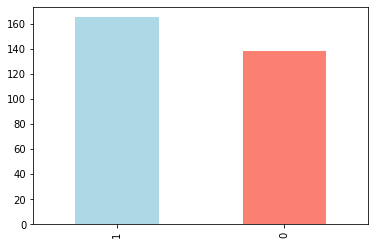

In [31]:
# Visualizing the above result with plot 

df['target'].value_counts().plot(kind = 'bar', color = ['lightblue', 'salmon'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
# checking the missing values in the data

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
# looking at descriptive statistics of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
# Lets take a closer look at how many males and females are there
# 0 - Female and 1 - male

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [36]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


#### Heart disease occurances per gender

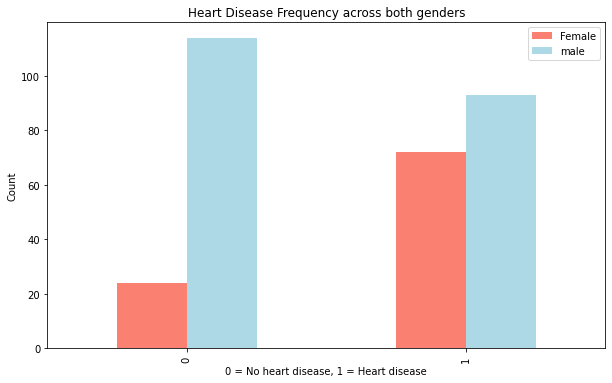

In [37]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    figsize = (10,6),
                                    color = ['salmon', 'lightblue'])

# adding other details to the plot

plt.title('Heart Disease Frequency across both genders')
plt.xlabel('0 = No heart disease, 1 = Heart disease')
plt.ylabel('Count')
plt.legend(['Female', 'male'])


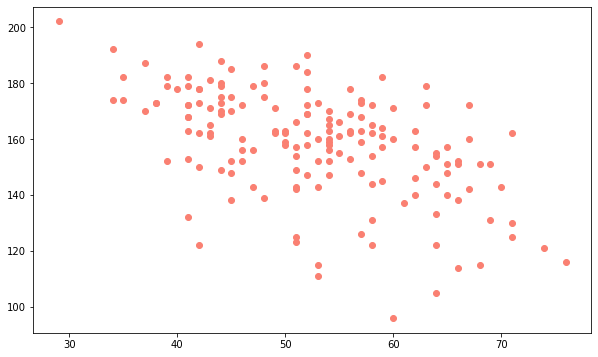

In [38]:
# Lets look the heart rate of people who have heart disease against their age

plt.figure(figsize = (10,6))

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
            c = 'salmon')

# we clearly see a cluster between the age of 50 and 70 where heart rate has been above 100

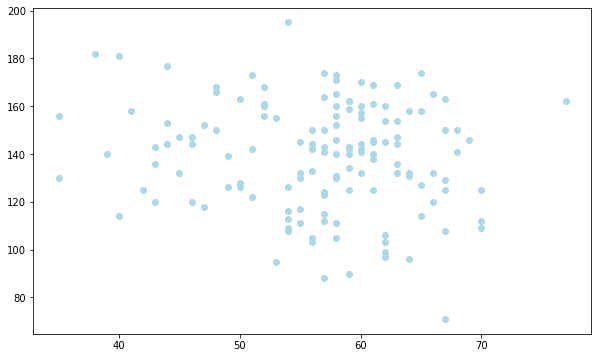

In [39]:
# Lets take a look at the heart rate of the people who dont have a heart disease against their age

plt.figure(figsize = (10,6))

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightblue')


<AxesSubplot:ylabel='Frequency'>

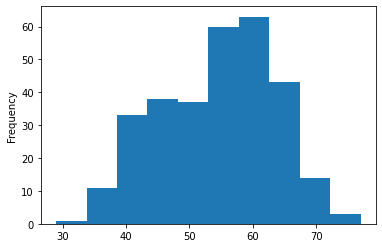

In [40]:
# Lets look at how the age is distributed in the data

df.age.plot.hist()

# as expected, a normal distribution is seen(also called as Gausian Distribution)

#### Looking at the heart disease against the category of chest pain

* cp - chest pain type

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
`Angina` - Angina, also known as angina pectoris, is chest pain or pressure, a symptom of coronary heart disease, usually due to insufficient blood flow to the heart muscle.


In [41]:
pd.crosstab(df.cp, df.target)

# We can see type 3 CP has the highest number of people having heart disease

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


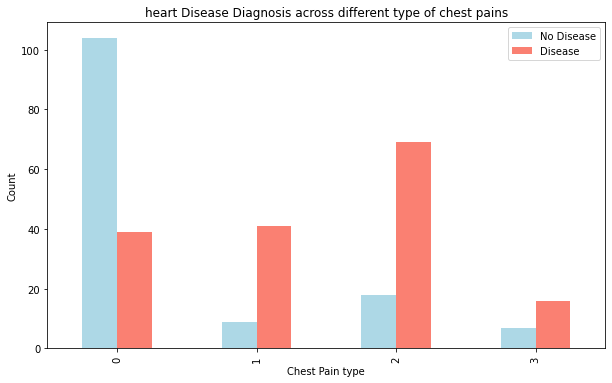

In [42]:
# Lets a take a closer look by ploting the crosstab 

pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10,6),
                                   color = ['lightblue', 'salmon'])

# adding some details to the plot

plt.title('heart Disease Diagnosis across different type of chest pains')
plt.xlabel('Chest Pain type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

In [43]:
# Time to check the Correlation Matrix

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


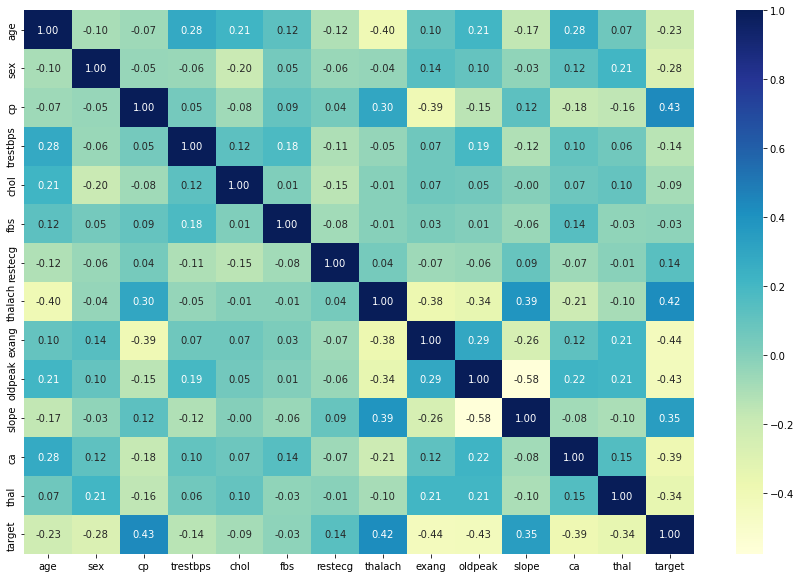

In [45]:
# Numbers above seems to be confusing to read so lets put it on heatmap

corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat, 
                 annot = True,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

### Modeling

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
X = df.drop('target', axis = 1)
y = df['target']

In [48]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2


In [51]:
len(y_train),len(y)

(242, 303)

We are going to try two different models here:
1. `RandomForestClassifier`
2. `Logistic Regression`

In [52]:
models = {'Logistic Regression' : LogisticRegression(),
          'Random Forest Classifier' : RandomForestClassifier()}

# lets create a fucntion to fit these models and get the score of the models

def fit_score(models, X_train, X_test, y_train, y_test):
    #Making a dictionary to store scores from the model
    model_scores = {}
    # creating the loop for models
    for name, model in models.items():
        #Fitting the model to the data
        model.fit(X_train, y_train)
        # Evaluating the mdoel and appending the score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [53]:
model_scores = fit_score(models = models, X_train = X_train,
                         X_test = X_test, y_train = y_train,
                         y_test = y_test)

model_scores

/Users/vishal.moradia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

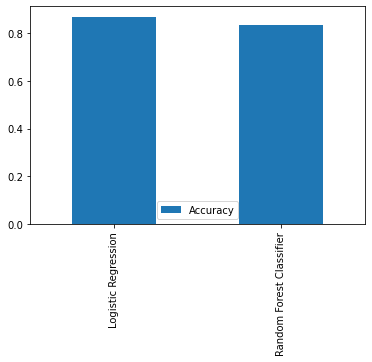

In [54]:
model_comparison = pd.DataFrame(model_scores, index = ['Accuracy'])

model_comparison.T.plot.bar()

# Both models are quite close but RandomForestClassifier seems to be the winner

#### Hyperparameters tuning:

Lets tune the hyperparameters for RandomForestClassifier to check and see if we can get the accuracy above 90 percent and ideally close to 95 if possible. 

In [55]:
# Using RandomizedSearchCV to get the best parameters

rf_grid = {'n_estimators' : np.arange(10, 1000, 20),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}


rfc_model = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 100,
                           verbose = True)

rfc_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770,
       790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990])},
                   verbose=True)

In [56]:
rfc_model.best_params_

{'n_estimators': 110,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [57]:
rfc_model.score(X_test, y_test)

# as we can see the score has decreased. So we will have to make some changes to check if the initial score is beatable.

0.8360655737704918

In [58]:
# Changing the parameters to see if we can beat the score of 88% accuracy.

rf_grid = {'n_estimators' : np.arange(10, 1000, 30),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}


rfc_model = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 40,
                           verbose = True)

rfc_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   verbose=True)

In [59]:
rfc_model.best_params_

{'n_estimators': 190,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_depth': None}

In [60]:
rfc_model.score(X_test, y_test)

# It seems like the score with default parameters results into the best accuracy for RandomForestClassifier. 

0.8524590163934426

Lets tune the hyperparameters for LogisticRegression to check and see if we can get the accuracy above 90 percent and ideally close to 95 if possible.

In [80]:
# we have different set of hyperparameters for our LogisticRegression Model

log_reg_grid = { 'C' : np.logspace(-3, 3, 15),
                'solver' : ['liblinear']}

# we will use GridSearchCV for our LogisticRegression Model

gs_log = GridSearchCV(LogisticRegression(),
                      param_grid = log_reg_grid,
                      cv = 5,
                      verbose = True)

# lets fit the data in the CV

gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03]),
                         'solver': ['liblinear']},
             verbose=True)

In [81]:
gs_log.best_params_

{'C': 0.13894954943731375, 'solver': 'liblinear'}

In [82]:
gs_log.score(X_test, y_test)

0.8688524590163934

Seems like tuning parameters are not improving the model any further. Hence, at 'C' of 0.13 and using 'liblinear' as solver gives us the best result. 